In [5]:
from tensorflow.keras.datasets import fashion_mnist
(x,y),(xt,yt) = fashion_mnist.load_data()


In [3]:
import yfinance as yf
import psycopg2

In [ ]:
    def get_time_interval():
        conn = psycopg2.connect(
            host="192.168.0.108",
            database="postgres",
            user="postgres",
            password="reallyStrongPwd123")
        curs = conn.cursor()
        curs.execute(
            """select symbol from saffron."security"  where sp500 = 'true' """)
        symb = curs.fetchall()
        symb = list(chain(*symb))
        # curs.execute("""select max(date)  from saffron."daily_price" """)
        curs.execute("""select max(date)  from saffron.daily_price """)
        db_last_date = curs.fetchone()[0]
        db_last_date_next = db_last_date + pd.Timedelta(days=1)
        current_date = datetime.today()
        conn.close()
        if current_date.isoweekday() == 7:
            current_date = current_date - pd.Timedelta(days=2)
        elif current_date.isoweekday() == 6:
            current_date = current_date - pd.Timedelta(days=1)
        return {"start": db_last_date_next.strftime("%Y-%m-%d"), "end": current_date.strftime("%Y-%m-%d"), "symbols": symb}

In [5]:
df = yf.download("MSFT FB", start="2021-01-01", end="2021-01-03")

[*********************100%***********************]  2 of 2 completed

2 Failed downloads:
- MSFT: No data found for this date range, symbol may be delisted
- FB: No data found for this date range, symbol may be delisted


In [10]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers,losses

class AutoEn(Model):
    def __init__(self, h,shapppe):
        super(AutoEn,self).__init__()
        
        self.encoder = Sequential([
            layers.Flatten(),
            layers.Dense(h,activation='relu')
        ])
        self.decoder = Sequential([
            layers.Dense(shapppe[0]*shapppe[1], activation='sigmoid'),
            layers.Reshape(shapppe)
        ])
    def call(self,x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return decoder

ae = AutoEn(64,x.shape[1:])

In [12]:
ae.compile(optimizer='adam', loss=losses.MeanSquaredError())
historty = ae.fit(x,x,epochs=10,shuffle=True, validation_data=(xt,xt))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13253.8033 - val_loss: 13291.2236
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13289.7038 - val_loss: 13290.5459
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13271.5643 - val_loss: 13290.2480
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13337.5244 - val_loss: 13289.9375
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13247.9327 - val_loss: 13289.6396
Epoch 6/10
1875/1875 [==============================] - 2s 980us/step - loss: 13277.0933 - val_loss: 13289.7588
Epoch 7/10
1875/1875 [==============================] - 2s 998us/step - loss: 13253.3746 - val_loss: 13289.8125
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13268.4590 - val_loss: 13289.8291
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 13255.1928 - val_loss: 13290.0244
Epoch 

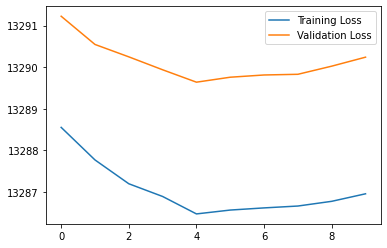

In [15]:
import matplotlib.pyplot as plt
plt.plot(historty.history["loss"], label="Training Loss")
plt.plot(historty.history["val_loss"], label="Validation Loss")
plt.legend()

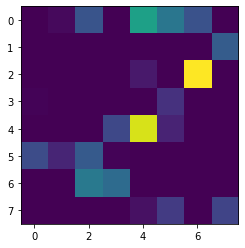

In [29]:
import numpy as np
encoded_images = ae.encoder(xt)
decoded_images = ae.decoder(encoded_images)

fig = plt.figure(figsize=(16,4))
# axes = fig.subplots(1,3)
plt.subplot(1,3,1)
plt.imshow( np.reshape(encoded_images.numpy()[0], (8,8)))
plt.imshow( np.reshape(decoded_images.numpy()[0], x.shape[1:]))
plt.imshow( xt[0])

 

In [3]:
!pwd

/home/lohrasp/lohrasp/analyticsoptim/tf


In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
sys.path.append(module_path+"/database")

In [13]:
from db_models import Stocks
import yfinance
from datetime import datetime

import psycopg2
# from database.postgres_sql_connect import config
import os
from itertools import chain
from database.postgres_sql_connect import config
from database.db_models import daily_price
import pandas as pd
import numpy as np

In [36]:
end = "2021-12-10"
weeks_back=20
symbs = ["MMC","MO"]
start = pd.to_datetime(end) - pd.Timedelta(weeks=weeks_back)
query  = f""" SELECT * from saffron."daily_price" where ticker='{symbs}' and date between '{start}' AND '{end}' """



In [21]:
def get_pg_cursur():
    conn = psycopg2.connect(
        host="192.168.0.108",
        database="postgres",
        user="postgres",
        password="reallyStrongPwd123")
    curs = conn.cursor()
    return curs

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [43]:
print(symbs)
curs = get_pg_cursur()
query2 = ""
if isinstance(symbs, str):
    query2 = f""" SELECT * from saffron."daily_price" where ticker='{symbs}' and date between '{start}' AND '{end}' """
elif isinstance(symbs, list):
    if len(symbs) == 1:
        query2 = f""" SELECT * from saffron."daily_price" where ticker='{symbs[0]}' and date between '{start}' AND '{end}' """
    else:
        symbols = tuple(symbs)
        query2 = f""" SELECT * from saffron."daily_price" where ticker in {symbols} and date between '{start}' AND '{end}' """
else:
    print("The symbols should be either a list or a string")
    
df = pd.read_sql_query(query2, con=curs.connection)

['MMC', 'MO']


In [35]:
f""" SELECT * from saffron.daily_price where ticker in {symbols}"""

" SELECT * from saffron.daily_price where ticker in ('AA', 'MSFT')"

In [26]:
__package__